# EE 399
### Ting Jones
### 4/24/23
### HW 3

## Part 1

In [ ]:
# github page: https://github.com/tingjones
# HW 2 repo: https://github.com/tingjones/ee399_hw3

In [1]:
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
from numpy import linalg 
from sklearn.datasets import fetch_openml

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [2]:
# Load the MNIST data
mnist = fetch_openml('mnist_784', parser="auto")
y = mnist.target
X = mnist.data / 255.0  # Scale the data to [0, 1]

# changing format of MNIST dataset so that each image is a column vector
X = X.to_numpy().T
print(X.shape)

(784, 70000)


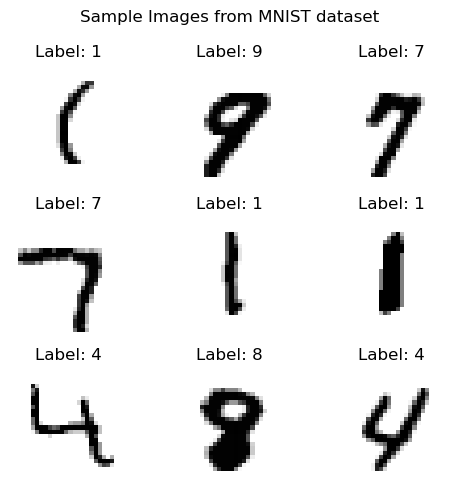

In [3]:
import random
# view random sample images in grayscale
fig = plt.figure(figsize=(5,5))
for i in range(9):
    ax = fig.add_subplot(3, 3, i+1)
    image_sel = random.randrange(0, X.shape[1])
    ax.imshow(X[:, image_sel].reshape(28, 28), cmap="binary")
    plt.title("Label: " + str(y[image_sel]))
    plt.axis('off')
plt.suptitle("Sample Images from MNIST dataset")
plt.tight_layout()

### Problem 1

In [4]:
# obtain random sample
rand_num = random.sample(range(X.shape[1]), 4000)
sample_x = X[:, rand_num]
sample_y = y[rand_num]
print(sample_x.shape)

(784, 4000)


In [5]:
# perform svd to factorize dataset
u, s, vt = np.linalg.svd(sample_x, full_matrices=False)

In [21]:
print("U.shape:", u.shape,"S.shape:", s.shape, "V^t.shape:", vt.shape)

U.shape: (784, 784) S.shape: (784,) V^t.shape: (784, 4000)


### Problem 2

29


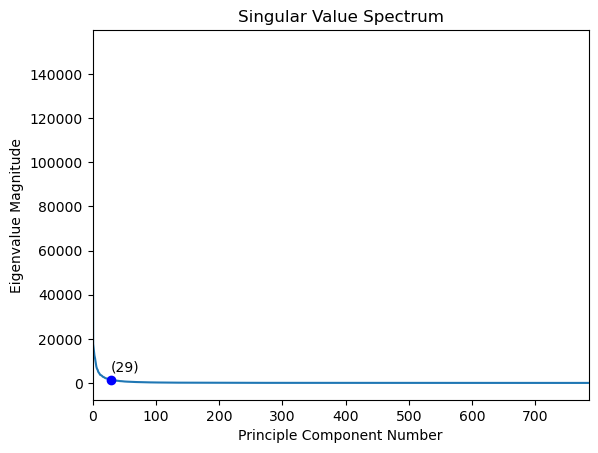

In [26]:
# Determine the rank r
threshold = 0.1 * s[0]
r = np.sum(s > threshold)
print(r)

eigval = s**2

# plot singular value spectrum
fig = plt.figure()
plt.plot(np.arange(0, sample_x.shape[0]), eigval)
plt.xlim(0, sample_x.shape[0])
plt.xlabel("Principle Component Number")
plt.ylabel("Eigenvalue Magnitude")
plt.annotate('(%s)' % (r), xy=(r, eigval[r] + 4000))
plt.plot(r, eigval[r], 'bo')
plt.title("Singular Value Spectrum")
plt.show()

### Problem 3

The SVD will factorize a 2D matrix <i>A</i> into three pieces, the first being <i>U</i>, the left singular vectors that span the column space of A, <i>Σ</i>, the singular values which are also denoted as S and are the root of the eigenvalue magnitude, and <i>V<sup> T </sup></i>, where V contains the right singular vectors which span the row space of A, and are the weights that are applied to U.
For these images, U contains the significant features for each of the images within each column (one column corresponds to each image). S contains the magnitude or importance (principle component vectors) of each of those vectors, and V is the coefficients applied to reach the original image.

### Problem 4

In [7]:
sample_y = np.array(sample_y, dtype='i4')

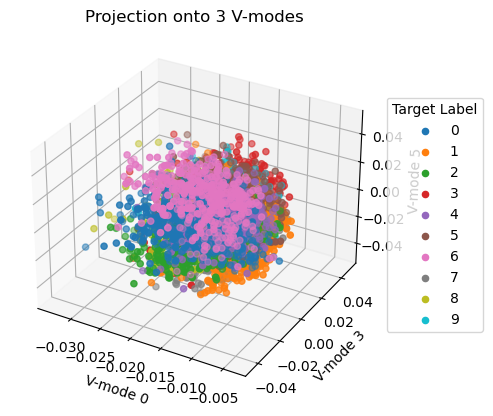

In [27]:
# Projecting onto three V-modes, 0, 3, 5
proj_matrix = [0, 3, 5]

# 3d Scatterplot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot projection of each of the images corresponding to a digit
# onto the three V-modes 0, 3, 5
for i in range(10):
    mask = sample_y == i
    ax.scatter(vt[proj_matrix[0], mask], vt[proj_matrix[1], mask], vt[proj_matrix[2], mask], label=str(i), s=20)

# Labels and legend
ax.set_xlabel('V-mode ' + str(proj_matrix[0]))
ax.set_ylabel('V-mode ' + str(proj_matrix[1]))
ax.set_zlabel('V-mode ' + str(proj_matrix[2]))
ax.legend(title='Target Label', loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("Projection onto 3 V-modes")

plt.show()

## Part 2

### Problem 5

In [9]:
# for label = 0, 3
mask = np.logical_or((sample_y == 0), (sample_y == 3))
sample_x_clf = sample_x[:, mask].T
sample_y_clf = sample_y[mask]

print("Number of samples with Label = 0 or 3:\nX:", sample_x_clf.shape, "\nY:", sample_y_clf.shape)

# split train/test
X_train, X_test, y_train, y_test = train_test_split(sample_x_clf, sample_y_clf, test_size=0.2)
print("Split:", X_train.shape, X_test.shape)

Number of samples with Label = 0 or 3:
X: (816, 784) 
Y: (816,)
Split: (652, 784) (164, 784)


In [10]:
# create the linear model SGDclassifier
from sklearn.linear_model import SGDClassifier
linear_clf = SGDClassifier()

# Train the classifier using fit() function
linear_clf.fit(X_train, y_train)

# Print the learned coefficients
print ("\nFirst 10 coefficients of the linear boundary are:", linear_clf.coef_[linear_clf.coef_ != 0][:10])
print ("\nThe point of intersection of the lines are:",linear_clf.intercept_)

# Evaluate the result
y_pred = linear_clf.predict(X_test)
# Calculate the accuracy of the classifier on the test set
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")


First 10 coefficients of the linear boundary are: [-0.800048   -2.18679787 -1.0400624  -0.400024   -0.01777884  0.40446871
  1.04450711  2.08456952  1.21785085  0.8800528 ]

The point of intersection of the lines are: [24.8613047]
Accuracy: 0.9817073170731707


### Problem 6

In [28]:
# for label = 1, 4, 5
mask = np.logical_or((sample_y == 1), (sample_y == 4), (sample_y == 5))
sample_x_clf = sample_x[:, mask].T
sample_y_clf = sample_y[mask]

print("Number of samples with Label = 1, 4 or 5:\nX:", sample_x_clf.shape, "\nY:", sample_y_clf.shape)

# split train/test
X_train, X_test, y_train, y_test = train_test_split(sample_x_clf, sample_y_clf, test_size=0.2)
print("Split:", X_train.shape, X_test.shape)

Number of samples with Label = 1, 4 or 5:
X: (847, 784) 
Y: (847,)
Split: (677, 784) (170, 784)


In [29]:
# Train the classifier using fit() function
linear_clf.fit(X_train, y_train)

# Print the learned coeficients
print ("\nFirst 10 coefficients of the linear boundary are:", linear_clf.coef_[linear_clf.coef_ != 0][:10])
print ("\nThe point of intersection of the lines are:",linear_clf.intercept_)

# Evaluate the result
y_pred = linear_clf.predict(X_test)
# Calculate the accuracy of the classifier on the test set
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")


First 10 coefficients of the linear boundary are: [-1.10505959 -0.14393633  0.03250175  0.02321554 -0.32037442 -1.17934931
 -0.60360398  1.37900294 -0.2460847  -0.29715888]

The point of intersection of the lines are: [9.42804633]
Accuracy: 1.0


### Problem 7 and 8

In [13]:
def find_worst_and_best(clf, sample_x, sample_y):
    worst = 100.0
    best = 0.0
    num1_w, num1_b, num2_w, num2_b = 0, 0, 0, 0

    for i in range(10):
        for j in range(i + 1, 10):
            # for varying labels
            mask = np.logical_or((sample_y == i), (sample_y == j))
            sample_x_clf = sample_x[:, mask].T
            sample_y_clf = sample_y[mask]

            # print("Number of samples with Label:", i, "or", j, "\nX:", sample_x_clf.shape, "\nY:", sample_y_clf.shape)

            # split train/test
            X_train, X_test, y_train, y_test = train_test_split(sample_x_clf, sample_y_clf, test_size=0.2)
            # print("Split:", X_train.shape, X_test.shape)

            # Train the classifier on the training set
            clf.fit(X_train, y_train)

            # Predict the labels of the test set
            y_pred = clf.predict(X_test)

            # Calculate the accuracy of the classifier on the test set
            accuracy = accuracy_score(y_test, y_pred)
            if (min(accuracy, worst) == accuracy):
                worst = accuracy
                num1_w, num2_w = i, j
            elif (max(accuracy, best) == accuracy):
                best = accuracy
                num1_b, num2_b = i, j

    return (num1_w, num1_b, num2_b, num2_w, worst, best)

In [14]:
num1_w, num1_b, num2_b, num2_w, worst, best = find_worst_and_best(linear_clf, sample_x, sample_y)
print("Most difficult to separate (minimum accuracy) is at indices:", num1_w, num2_w)
print("with an accuracy of:", worst, "\n")

print("Easiest to separate (maximum accuracy) is at indices:", num1_b, num2_w)
print("with an accuracy of:", best)

Most difficult to separate (minimum accuracy) is at indices: 3 5
with an accuracy of: 0.9230769230769231 

Easiest to separate (maximum accuracy) is at indices: 6 5
with an accuracy of: 1.0


### Problem 9: Support Vector Machines

In [15]:
# Create a Support Vector Machine (SVM) classifier
svc_clf = SVC(kernel="linear")
num1_w, num1_b, num2_b, num2_w, worst, best = find_worst_and_best(svc_clf, sample_x, sample_y)

print("Most difficult to separate (minimum accuracy) is at indices:", num1_w, num2_w)
print("with an accuracy of:", worst, "\n")

print("Easiest to separate (maximum accuracy) is at indices:", num1_b, num2_w)
print("with an accuracy of:", best)

Most difficult to separate (minimum accuracy) is at indices: 5 8
with an accuracy of: 0.9256756756756757 

Easiest to separate (maximum accuracy) is at indices: 6 8
with an accuracy of: 1.0


### Problem 9: Decision Tree Classifiers

In [16]:
import sklearn.tree
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(random_state=42)

num1_w, num1_b, num2_b, num2_w, worst, best = find_worst_and_best(tree_clf, sample_x, sample_y)

print("Most difficult to separate (minimum accuracy) is at indices:", num1_w, num2_w)
print("with an accuracy of:", worst, "\n")

print("Easiest to separate (maximum accuracy) is at indices:", num1_b, num2_w)
print("with an accuracy of:", best)

Most difficult to separate (minimum accuracy) is at indices: 4 7
with an accuracy of: 0.9090909090909091 

Easiest to separate (maximum accuracy) is at indices: 1 7
with an accuracy of: 1.0


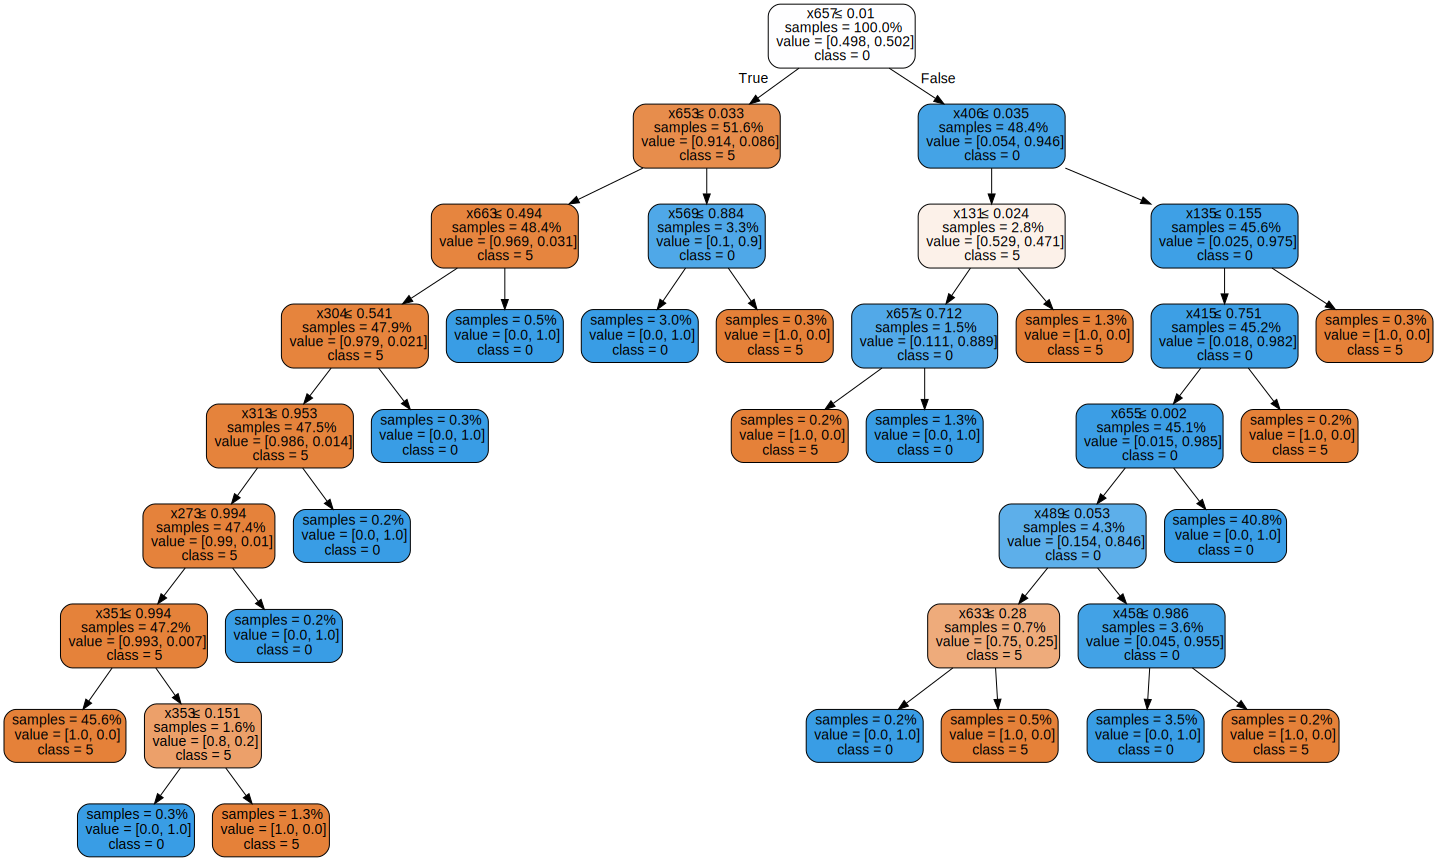

In [17]:
# for varying labels
mask = np.logical_or((sample_y == 6), (sample_y == 8))
sample_x_clf = sample_x[:, mask].T
sample_y_clf = sample_y[mask]

# print("Number of samples with Label:", i, "or", j, "\nX:", sample_x_clf.shape, "\nY:", sample_y_clf.shape)

# split train/test
X_train, X_test, y_train, y_test = train_test_split(sample_x_clf, sample_y_clf, test_size=0.2)
# print("Split:", X_train.shape, X_test.shape)

# Train the classifier on the training set
tree_clf.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = tree_clf.predict(X_test)


import graphviz

# Plot the tree structure using Graphviz
dot_data = sklearn.tree.export_graphviz(tree_clf, out_file="tree_1.dot", class_names=mnist.target,
                                        impurity=False, proportion = True, filled=True, rounded=True, special_characters=True)

with open("tree_1.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

### Problem 10

For the LDA Classifier:
Most difficult to separate (minimum accuracy) is at indices: 3 5
with an accuracy of: 0.9230769230769231 

Easiest to separate (maximum accuracy) is at indices: 6 5
with an accuracy of: 1.0

For the SVM Classifier:
Most difficult to separate (minimum accuracy) is at indices: 5 8
with an accuracy of: 0.9256756756756757 

Easiest to separate (maximum accuracy) is at indices: 6 8
with an accuracy of: 1.0

For the Decision Tree Classifier:
Most difficult to separate (minimum accuracy) is at indices: 4 7
with an accuracy of: 0.9090909090909091 

Easiest to separate (maximum accuracy) is at indices: 1 7
with an accuracy of: 1.0

Overall, all of the classifiers did best separating different classes, though 6 appears across both SVM and Decision Tree classifiers, indicating that it is more easily distinguishable. Additionally, both LDA and SVMs struggled to distinguish images with the number 5, as this was found in its pairing for least accuracy.
The SVM Classifier had the greatest overall accuracy at its best and worst case and the Decision Tree Classifier had the worst overall accuracy at its worst case.